# Name: Chandhini Bayina 
# Home Assignment 1: Implement Gradient Descent for Linear Regression

This notebook implements linear regression on a synthetic dataset using **two approaches**:

1. **Closed-form (Normal Equation)**  
2. **Gradient Descent**

Implementations:
- Raw data scatter plot
- Fitted line from the Normal Equation
- Fitted line from Gradient Descent
- Loss (MSE) vs iterations plot for Gradient Descent
- A brief comparison and metrics (MSE)

**Note**: Only `numpy` and `matplotlib` are used. No `scikit-learn`.


## Imports
Install the below packages from iTerm or use `!` for inline installation:

```bash
pip install numpy matplotlib
```

```bash
! pip install numpy matplotlib
```


In [1]:
! pip install numpy matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# for reproducibility
np.random.seed(42)


## 1. Generate Dataset and plot raw data
Generating 200 samples with $x \sim \mathcal{U}[0,5]$ and 
$y = 3 + 4x + \epsilon$, where $\epsilon \sim \mathcal{N}(0, 1^2)$ (Gaussian noise).


x shape: (200, 1), y shape: (200, 1)


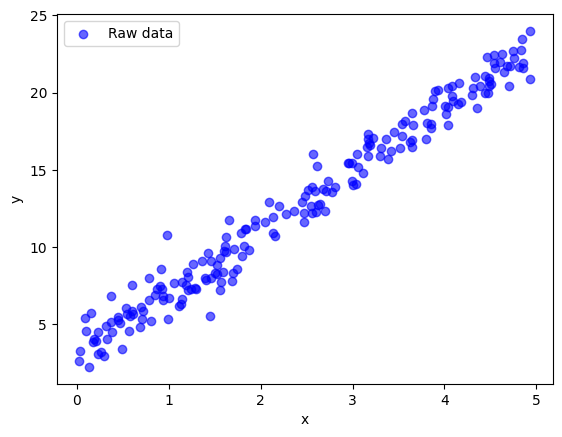

In [3]:
m = 200  # number of samples
x = np.random.uniform(0.0, 5.0, size=(m, 1))  # shape (m, 1)
epsilon = np.random.normal(loc=0.0, scale=1.0, size=(m, 1))
y = 3.0 + 4.0 * x + epsilon  # true intercept=3, slope=4

print(f"x shape: {x.shape}, y shape: {y.shape}")

# Plot raw data
plt.scatter(x, y, color="blue", alpha=0.6, label="Raw data")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

### Add Bias (Intercept) Column to X
Building the design matrix $X$ as `[1, x]` so the parameter vector is $\theta = [b, w]^T$.


In [4]:
# Design matrix X = [1, x]
ones = np.ones((m, 1))
X = np.concatenate([ones, x], axis=1)              # shape (m, 2) -> columns: [bias, feature]

# Normal Equation using np.dot
XtX = np.dot(X.T, X)                               # X^T X
XtX_inv = np.linalg.inv(XtX)                       # (X^T X)^{-1}
Xt_y = np.dot(X.T, y)                              # X^T y
theta_ne = np.dot(XtX_inv, Xt_y)                   # theta (shape (2,1))

b_ne = float(theta_ne[0, 0])
w_ne = float(theta_ne[1, 0])
print(f"[Normal Eq] Intercept (b): {b_ne:.4f}, Slope (w): {w_ne:.4f}")


[Normal Eq] Intercept (b): 3.1052, Slope (w): 3.9844


## 2. Closed-form solution (Normal Equation)

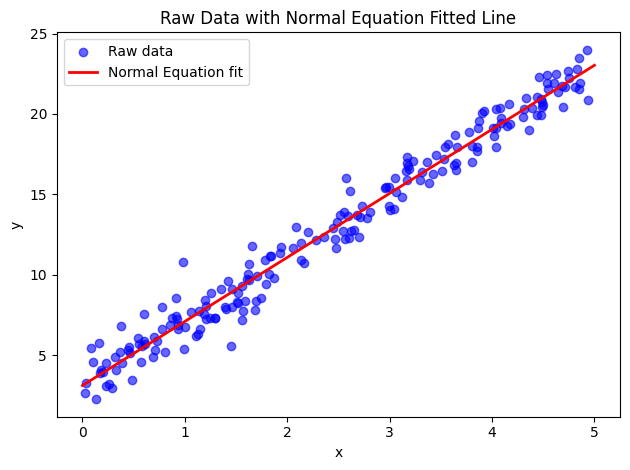

In [5]:
# Line grid for plotting
x_line = np.linspace(0, 5, 200).reshape(-1, 1)
X_line = np.concatenate([np.ones_like(x_line), x_line], axis=1)
y_ne_line = np.dot(X_line, theta_ne)               # predictions for NE line (shape (200,1))

# Plot: raw + NE line
plt.figure()
plt.scatter(x, y, color="blue", alpha=0.6, label="Raw data")
plt.plot(x_line, y_ne_line, "r-", linewidth=2.0, label="Normal Equation fit")
plt.xlabel("x"); plt.ylabel("y")
plt.title("Raw Data with Normal Equation Fitted Line")
plt.legend(); plt.tight_layout(); plt.show()

## Helper Functions: MSE and Gradient of MSE for Gradient Descent
Using the MSE loss and its gradient with respect to $\theta$ for gradient descent:

$$J(\theta) = \frac{1}{m}\lVert X\theta - y \rVert^2$$
$$\nabla J(\theta) = \frac{2}{m} X^T (X\theta - y)$$


In [6]:
def predict(X, theta):
    """Return predictions for design matrix X and parameter vector theta."""
    return np.dot(X, theta)

def mse(X, y, theta):
    """Mean Squared Error using np.dot throughout."""
    residuals = predict(X, theta) - y
    return float(np.dot(residuals.T, residuals) / X.shape[0])

def grad_mse(X, y, theta):
    """Gradient of the MSE: (2/m) * X^T (X theta - y)."""
    m = X.shape[0]
    return (2.0 / m) * np.dot(X.T, (np.dot(X, theta) - y))


## 3. Gradient Descent Implementation
- Initialize $\theta = [0, 0]^T$  
- Learning rate $\eta = 0.05$  
- Run for 1000 iterations  
Tracking the MSE at every iteration to visualize convergence.


In [7]:
def gradient_descent(X, y, lr=0.05, num_iters=1000):
    theta = np.zeros((X.shape[1], 1))  # [b, w]^T
    losses = []
    for i in range(num_iters):
        # Compute gradient using only np.dot
        g = grad_mse(X, y, theta)
        # Parameter update
        theta = theta - lr * g
        # Track current MSE
        losses.append(mse(X, y, theta)) 
    return theta, np.array(losses)

theta_gd, losses = gradient_descent(X, y, lr=0.05, num_iters=1000)
b_gd, w_gd = float(theta_gd[0, 0]), float(theta_gd[1, 0])
print(f"[Grad Descent] Intercept (b): {b_gd:.4f}, Slope (w): {w_gd:.4f}")


[Grad Descent] Intercept (b): 3.1052, Slope (w): 3.9844


/var/folders/h_/_bjpnb894kgf18frynwf6bww0000gn/T/ipykernel_71553/2930064169.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(residuals.T, residuals) / X.shape[0])


## Plots for Normal Equation and Gradient Descent
Producing:
1. **Data + Fitted Lines** (Normal Equation and Gradient Descent)
2. **Loss (MSE) vs Iterations** for Gradient Descent

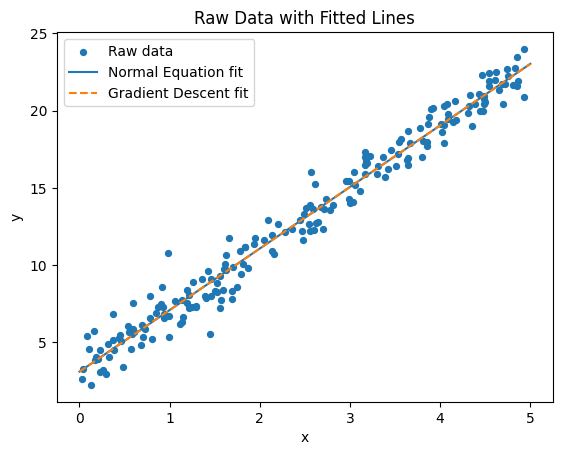

In [8]:
# Raw data and fitted lines
plt.figure()
plt.scatter(x, y, s=18, label='Raw data')

# Build x-axis for line plotting (sorted for a clean line)
x_line = np.linspace(0, 5, 200).reshape(-1, 1)
X_line = np.concatenate([np.ones_like(x_line), x_line], axis=1)
y_ne_line = predict(X_line, theta_ne)
y_gd_line = predict(X_line, theta_gd)

plt.plot(x_line, y_ne_line, label='Normal Equation fit')
plt.plot(x_line, y_gd_line, linestyle="--", label='Gradient Descent fit')
plt.title('Raw Data with Fitted Lines')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


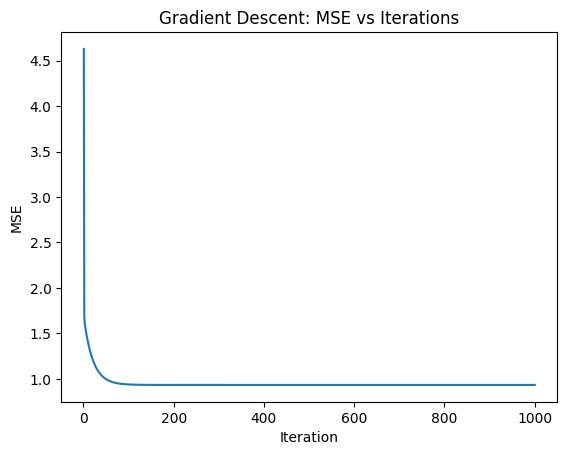

In [9]:
# Loss curve (MSE vs iterations) for Gradient Descent
plt.figure()
plt.plot(np.arange(1, losses.shape[0] + 1), losses) # iterations start at 1
plt.title('Gradient Descent: MSE vs Iterations')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.show()


## 4. Metrics & Comparison

In [10]:
mse_ne = mse(X, y, theta_ne) # MSE for Normal Equation
mse_gd = mse(X, y, theta_gd) # MSE for Gradient Descent

print("Metrics (lower MSE):") # lower is better
print(f"\tNormal Eq  -> MSE: {mse_ne:.6f}")
print(f"\tGradDesc   -> MSE: {mse_gd:.6f}") 

print("\nComment:")
print("""
\tBoth methods should converge to very similar parameters and metrics.
\tSmall differences arise because gradient descent is iterative and may
\tstop with a tiny optimization error depending on learning rate and iterations
""")


Metrics (lower MSE):
	Normal Eq  -> MSE: 0.933826
	GradDesc   -> MSE: 0.933826

Comment:

	Both methods should converge to very similar parameters and metrics.
	Small differences arise because gradient descent is iterative and may
	stop with a tiny optimization error depending on learning rate and iterations



/var/folders/h_/_bjpnb894kgf18frynwf6bww0000gn/T/ipykernel_71553/2930064169.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return float(np.dot(residuals.T, residuals) / X.shape[0])


## Explanation of results
- Normal Equation gives the **exact** solution (assuming $(X^TX)$ is invertible).  
- Gradient Descent converges to the same solution under a good learning rate and enough iterations.  
- For very large feature spaces, the Normal Equation is expensive due to the matrix inverse, while Gradient Descent scales better.
